# Preprocessing file names

In [7]:
# Preprocessing file names for the dataset
import os

def rename_files_in_folder(folder_path, GEN):
    files = os.listdir(folder_path)
    files = [file for file in files if os.path.isfile(os.path.join(folder_path, file))]
    # files.sort()
    
    for index, file_name in enumerate(files):
        extension = os.path.splitext(file_name)[1]
        if GEN:
            new_file_name = f"gen{index + 1}{extension}"
        else:
            new_file_name = f"real{index + 1}{extension}"
        
        old_file_path = os.path.join(folder_path, file_name)
        new_file_path = os.path.join(folder_path, new_file_name)
        
        os.rename(old_file_path, new_file_path)

generated_images = "E:\\CS 512 Project\\Proj\\data_image_classification\\generated_images"
real_images = "E:\\CS 512 Project\\Proj\\data_image_classification\\real_images"

In [8]:
rename_files_in_folder(generated_images, True)
rename_files_in_folder(real_images, False)

# Basic model trial

In [5]:
!pip install tensorflow matplotlib
!pip install scipy
!pip install -U scikit-learn

In [1]:
import numpy as np

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = 'E:/CS 512 Project/Proj/data_image_classification'
train_dir_generated = os.path.join(base_dir, 'generated_images')
train_dir_real = os.path.join(base_dir, 'real_images')

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # resize images to 150x150
    batch_size=32,
    class_mode='binary', 
    subset='training' 
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)



Found 1373 images belonging to 2 classes.
Found 342 images belonging to 2 classes.


In [2]:
train_generator.class_indices

{'generated_images': 0, 'real_images': 1}

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.7),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


c:\Users\Manan\anaconda3\envs\proj\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [4]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',   # Monitor the validation loss
    patience=3,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=100, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks=[early_stopping]
)


Epoch 1/20


c:\Users\Manan\anaconda3\envs\proj\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 43/100 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.5967 - loss: 1.4417

c:\Users\Manan\anaconda3\envs\proj\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.6344 - loss: 1.2509 - val_accuracy: 0.8216 - val_loss: 0.6952
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.7734 - loss: 0.6941 - val_accuracy: 0.8684 - val_loss: 0.5303
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.8241 - loss: 0.5248 - val_accuracy: 0.8421 - val_loss: 0.4452
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.8436 - loss: 0.4764 - val_accuracy: 0.8187 - val_loss: 0.4775
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.8421 - loss: 0.4421 - val_accuracy: 0.8509 - val_loss: 0.3836
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.8533 - loss: 0.4163 - val_accuracy: 0.8275 - val_loss: 0.4278
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.8594 - loss: 0.3961 - val_accuracy: 0.8596 - val_loss: 0.3885
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.8612 - loss: 0.3955 - val_accuracy: 0.880

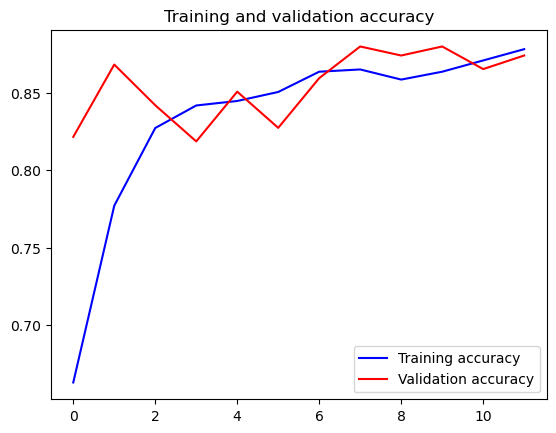

In [6]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()


In [10]:
model.save('E:\\CS 512 Project\\Proj\\basic_cnn_model.keras')

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,102,533 (217.83 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,068,356 (145.22 MB)

### trial predictions

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('E:\\CS 512 Project\Proj\\basic_cnn_model.keras')

In [16]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def preprocess_image(image_path, target_size=(150, 150)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

new_image_path = 'E:\\CS 512 Project\\8e4b560a-c937-48d5-901c-fc81b581e04b.webp'
processed_image = preprocess_image(new_image_path)

In [23]:
prediction = model.predict(processed_image)

is_real = prediction[0][0] > 0.5

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [24]:
if is_real:
    print("The image is predicted to be a real image.")
else:
    print("The image is predicted to be a generated image.")


The image is predicted to be a real image.
